Brandon Woo

CNN-RNN Assignment

1) Fashion MNIST Classification with RNNs 

Explain how you can classify the fashion MNIST dataset using LSTM RNNS. You need to draw the LSTM RNN architecture (pref unrolled) and comment on all dimensions that you decide.

IMAGE BELOW: LSTM RNN architecture

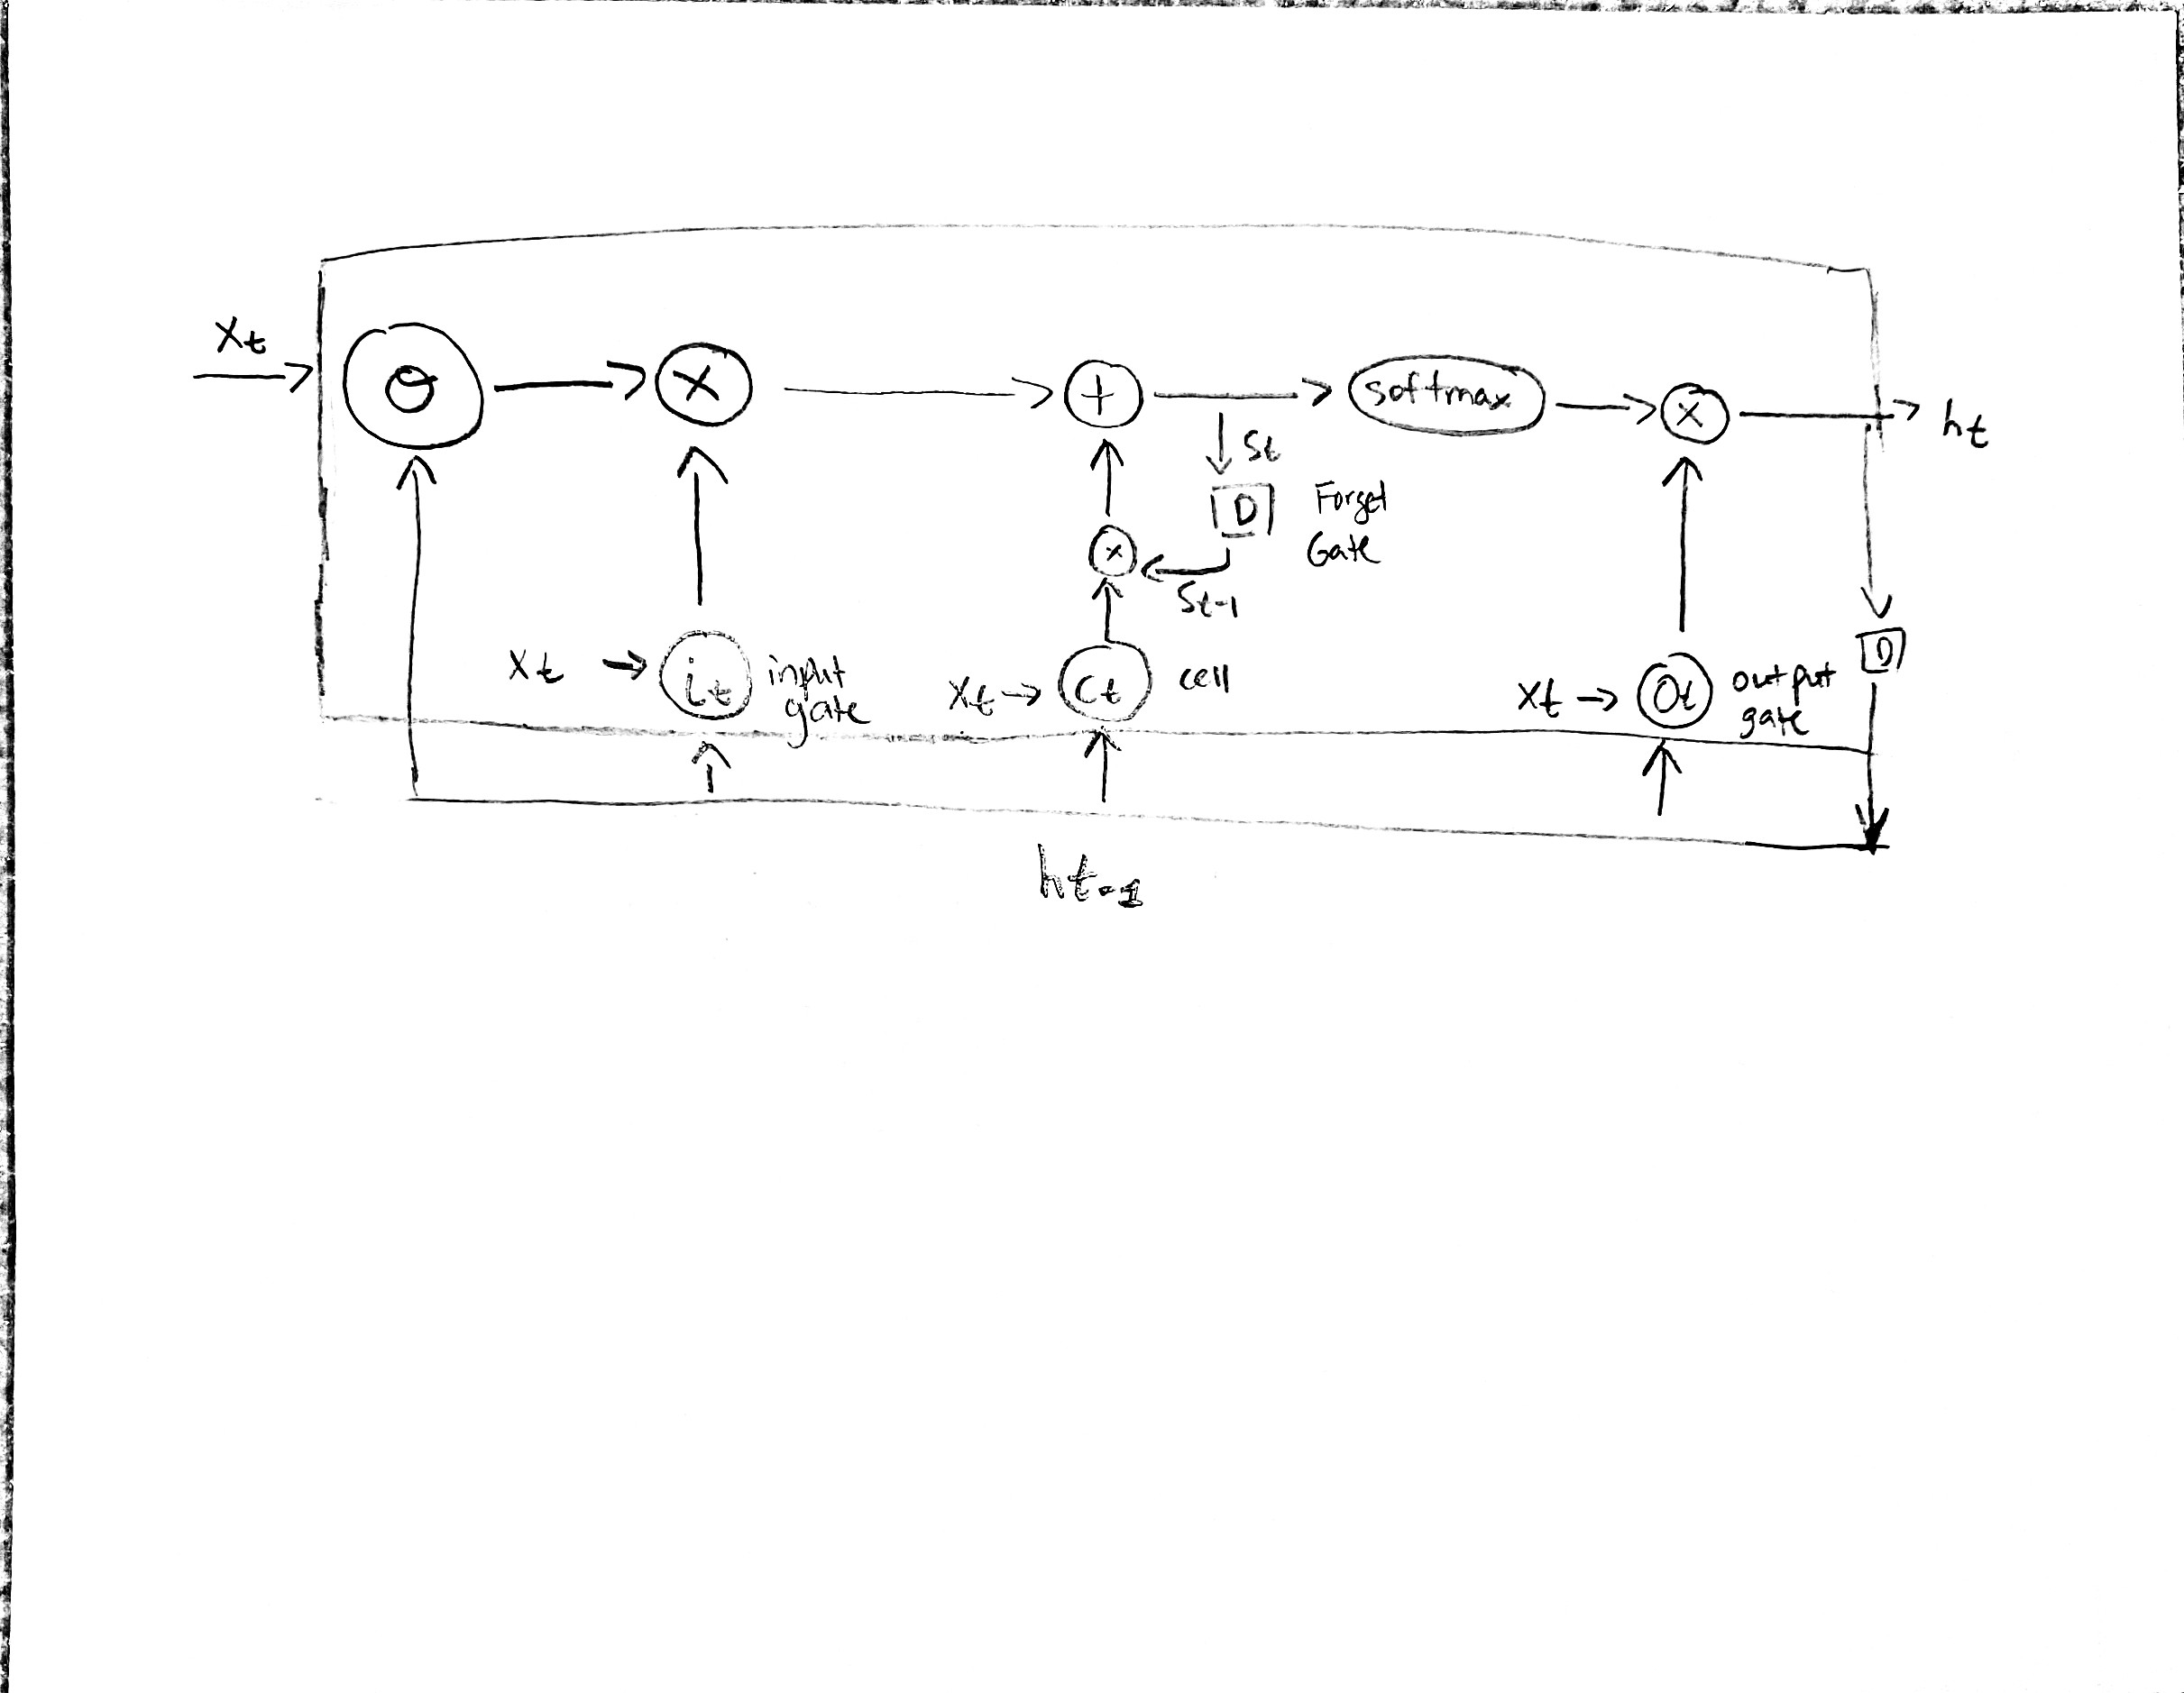

Classifying the fasion MNIST dataset using LSTM RNNs is possible because unlike CNN which is used for image classification, we can use LSTM RNNs so that we can recognize image features across time. And improve the model across time through batches and epochs of trial and error. Instead of using hidden units, we use the memomry cells so that we can remember the previous iteration and improve on that classification from the given information from the previous iteration. The input, output, and forget gates control the information that is being inputted and outputted of the memory cell. 

2) RNN Implementation

Implement the RNN approach you outlined in the previous question using TF or PyTortch. Implement the equivalent CNN using the same framework (CNN solution is in your notes so just include this solution).

CNN

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array, array_to_img
import os
import keras
import pandas as pd

print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape


(10000, 28, 28)

In [8]:
len(test_labels)


10000

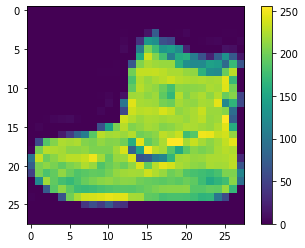

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

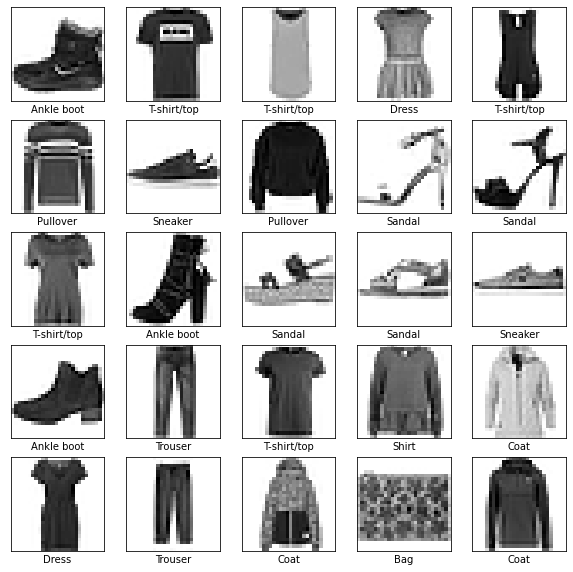

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4930 - accuracy: 0.8278
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2934 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2805 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2682 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2455 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3610 - accuracy: 0.8777 - 533ms/epoch - 2ms/step

Test accuracy: 0.8776999711990356


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions[0]

array([1.6847001e-07, 2.9222974e-10, 2.3447317e-09, 3.2325005e-09,
       1.4149311e-08, 2.8960372e-03, 3.2020549e-07, 5.3577509e-02,
       1.2748212e-08, 9.4352597e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

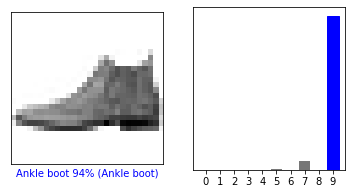

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

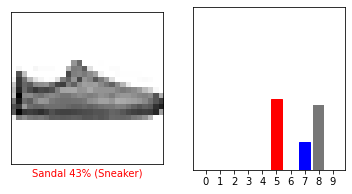

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

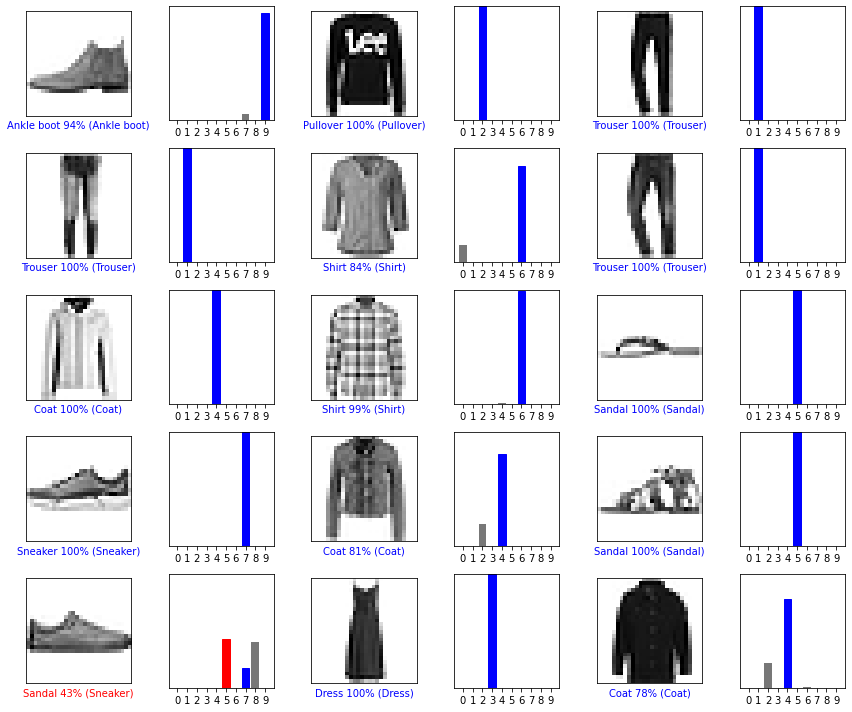

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.04306411e-06 5.21857846e-16 9.99881864e-01 1.23778348e-14
  1.14806920e-04 6.19351413e-13 1.34012726e-06 1.04067236e-16
  5.37360885e-11 1.72394597e-17]]


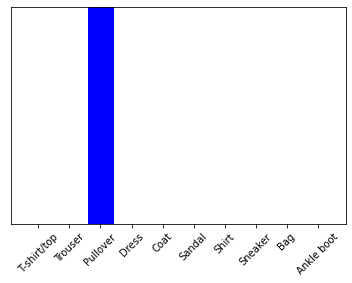

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2

RNN/LSTM

In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [32]:
model = Sequential()

no_of_units = 10
no_of_steps = 28
no_of_inputs = 28
no_of_outputs = 10
batch_size = 1
no_of_epochs = 10

model.add(LSTM(128, input_shape=(no_of_steps, no_of_inputs)))
model.add(Dense(no_of_outputs, activation='softmax'))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=no_of_epochs, shuffle=False)
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 64s 33ms/step - loss: 0.6477 - accuracy: 0.7701
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4953 - accuracy: 0.8218
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.4695 - accuracy: 0.8278
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4549 - accuracy: 0.8331
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4484 - accuracy: 0.8345
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4297 - accuracy: 0.8421
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4181 - accuracy: 0.8450
Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4092 - accuracy: 0.8493
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4025 - accuracy: 0.8509
Epoch 10/10
313/313 [==============================] - 4s 12ms/step - loss:

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.4359 - accuracy: 0.8426 - 3s/epoch - 11ms/step

Test accuracy: 0.8425999879837036


3) Performance Comparison

Compare the performance of the LSTM RNN network vs CNN. Compare the training times between RNN and CNN that achieves the same test performance.

RNN architecture achieves a loss: 0.4359 - accuracy: 0.8426 - 3s/epoch - 11ms/step

CNN architecture achieves a loss: 0.3610 - accuracy: 0.8777 - 533ms/epoch - 2ms/step

So after running both the LSTM RNN network and CNN, we can compare the performance and say that the CNN architecture achieves a better accuracy and within a shorter period of time. This result and performance could change given more epochs and a greater batch size because the RNN's performance improves over time. So given more iterations and experiments there is a chance that the peformance could later surpass the CNN since the RNN result is based off previous iterations, memory, and time.

Additionally, if I ran the RNN until the test peformance was the same as the CNN, I believe that the training time would be longer for the RNN than the CNN.


4) CNN + RNN

Read this paper and write a summary on how RNN and CNNs can be combined for the classification task and why you believe we get a performance benefit from such combination.

After reading the paper on how RNN and CNNs can be combined for the classification task, it is clear that we would get a peformance benefit from such a combination. Real-world imagery has became important in the field of classification. Modeling label dependency, most experiments require the graphical models, which the common approach is to model the co-occurerence dependencies with pairwise compatibility probabilities or co-occurrence probabilities and use Markov random fields to infer the final joint label probability. However dealing with large set of labels can cause problems. RNN is very important to improve the classification accuracy. In the paper, they model the label dependencies with recurrent neural networks to capture higher-order label relationships whil keeping the computation complexity tractable. For CNN, it is used to avoid problems such as overfitting. Using the same image features however to predict multiple lables can cause problems since the objects that are small in the images are easily missed and not identified. So now with the problems and solutions that both CNNs and RNNs bring to the experiment, the model in the paper combines the two to create a better solution that can improve performance. The CNN can use most of its power to focus on the different regions of the image when predicting different labels and RNNs can use the previous layers to improve the weights and accuracy of the model and also used its memory from LSTM to remember the product and results from the images/information from CNN. Not only does exploiting the semantic redundancies reduce the computational cost, it also improves the generalization ability because the labels with duplicate semantics can get more training data. RNN with LSTM can effectively model the long-term temporal dependency in a sequence. The CNN part extracts semantic representations from images; the RNN part models image/label relationship and label dependency.